## Modelagem

Nesta série de scripts iremos começar o processo de modelagem. O método que mais se aplica ao nosso conjunto de dados é a análise de dados em painel. Aqui iremos aplicar este primeiro método e depois iremos explorar outras opções. Usei o exemplo desse [link](https://bashtage.github.io/linearmodels/panel/examples/examples.html).

Links:
1. [A Guide to Panel Data Regression: Theoretics and Implementation with Python](https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8)

In [115]:
# Carregar librarias
import pandas as pd
import statsmodels.api as sm
from linearmodels.datasets import wage_panel
from linearmodels.panel import PooledOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import BetweenOLS
from linearmodels.panel import compare
from linearmodels import PanelOLS
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy import stats

In [93]:
# Carregar dataset dos anos 2000-2014
data_sugarcane = pd.read_csv("new_data_all_2000-2014.csv", sep =  ';').drop(['AP'], axis = 1)

In [94]:
# Visão dos dados
data_sugarcane.head()

,CD_MUN,MUN,Year,Yield,AC,QP,VP,AET,NDVI,NPP,SOIL,TMIN,TMMX,PR,LST
0,3500105,Adamantina (SP),2000,50000.0,7000.0,350000.0,6244.0,704,5174.465583,4047,165.814275,163,288,91,15244
1,3500204,Adolfo (SP),2000,NaN,NaN,NaN,NaN,716,4079.833442,5245,255.016962,162,290,94,15090
2,3500303,Aguaí (SP),2000,80000.0,5250.0,420000.0,7493.0,675,5613.906725,8672,398.974009,151,272,109,15133
3,3500550,Águas de Santa Bárbara (SP),2000,NaN,NaN,NaN,NaN,776,5388.291761,8146,245.525207,142,270,95,15148
4,3500709,Agudos (SP),2000,70000.0,8000.0,560000.0,9990.0,746,5968.640067,9080,247.830150,146,274,94,15097


In [95]:
# Correlação
data_sugarcane.corr()

,CD_MUN,Year,Yield,AC,QP,VP,AET,NDVI,NPP,SOIL,TMIN,TMMX,PR,LST
CD_MUN,1.000000e+00,-4.458548e-14,-0.007790,-0.007615,-0.012412,-0.010064,0.036976,-0.010086,-0.053530,0.010911,0.076214,0.065554,0.022820,0.037128
Year,-4.458548e-14,1.000000e+00,0.026385,0.162572,0.154424,0.322169,0.130313,0.224516,0.325575,0.121416,-0.048182,-0.038045,0.096274,-0.071528
Yield,-7.790052e-03,2.638453e-02,1.000000,0.060631,0.137406,0.094055,-0.049899,-0.170335,-0.156498,-0.087025,0.176712,0.191148,-0.018506,0.179961
AC,-7.615256e-03,1.625716e-01,0.060631,1.000000,0.989397,0.918264,0.064064,-0.081703,-0.074609,0.069506,0.153077,0.126971,0.115708,0.123963
QP,-1.241222e-02,1.544237e-01,0.137406,0.989397,1.000000,0.916083,0.059743,-0.080517,-0.069080,0.083533,0.151939,0.126785,0.133823,0.118256
VP,-1.006405e-02,3.221685e-01,0.094055,0.918264,0.916083,1.000000,0.084551,-0.056062,-0.039344,0.062530,0.153905,0.133272,0.074765,0.125486
AET,3.697584e-02,1.303132e-01,-0.049899,0.064064,0.059743,0.084551,1.000000,0.236418,0.009244,0.182382,-0.023425,0.007912,0.340296,-0.170411
NDVI,-1.008627e-02,2.245156e-01,-0.170335,-0.081703,-0.080517,-0.056062,0.236418,1.000000,0.695081,0.533200,-0.565049,-0.596675,0.427329,-0.671717
NPP,-5.352990e-02,3.255747e-01,-0.156498,-0.074609,-0.069080,-0.039344,0.009244,0.695081,1.000000,0.523681,-0.794009,-0.816318,0.429378,-0.829088
SOIL,1.091146e-02,1.214162e-01,-0.087025,0.069506,0.083533,0.062530,0.182382,0.533200,0.523681,1.000000,-0.415863,-0.439276,0.689311,-0.460754


In [96]:
# Converter o ano para categórico
year_sugar = pd.Categorical(data_sugarcane.Year)
year_sugar

[2000, 2000, 2000, 2000, 2000, ..., 2014, 2014, 2014, 2014, 2014]
Length: 7275
Categories (15, int64): [2000, 2001, 2002, 2003, ..., 2011, 2012, 2013, 2014]

In [97]:
# Criar o index utilizando o ano e o código do municipio
data_sugar = data_sugarcane.set_index(['CD_MUN', 'Year'])

In [98]:
# Adicionar a coluna do ano
data_sugar['Year'] = year_sugar

In [99]:
# Info
data_sugar.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7275 entries, (3500105, 2000) to (3557303, 2014)
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   MUN     7275 non-null   object  
 1   Yield   6653 non-null   float64 
 2   AC      6655 non-null   float64 
 3   QP      6655 non-null   float64 
 4   VP      6655 non-null   float64 
 5   AET     7275 non-null   int64   
 6   NDVI    7275 non-null   float64 
 7   NPP     7275 non-null   int64   
 8   SOIL    7275 non-null   float64 
 9   TMIN    7275 non-null   int64   
 10  TMMX    7275 non-null   int64   
 11  PR      7275 non-null   int64   
 12  LST     7275 non-null   int64   
 13  Year    7275 non-null   category
dtypes: category(1), float64(6), int64(6), object(1)
memory usage: 788.7+ KB


In [100]:
# Selecionar as variáveis que serão utilizadas na modelagem
exog_vars_sugar = ['AC', 'QP', 'VP', 'AET', 'NDVI', 'SOIL', 'TMIN', 'TMMX', 'PR', 'LST','Year']

In [101]:
# Adicionar a constante
exog_sugar = sm.add_constant(data_sugar[exog_vars_sugar])
exog_sugar.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7275 entries, (3500105, 2000) to (3557303, 2014)
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   const   7275 non-null   float64 
 1   AC      6655 non-null   float64 
 2   QP      6655 non-null   float64 
 3   VP      6655 non-null   float64 
 4   AET     7275 non-null   int64   
 5   NDVI    7275 non-null   float64 
 6   SOIL    7275 non-null   float64 
 7   TMIN    7275 non-null   int64   
 8   TMMX    7275 non-null   int64   
 9   PR      7275 non-null   int64   
 10  LST     7275 non-null   int64   
 11  Year    7275 non-null   category
dtypes: category(1), float64(6), int64(5)
memory usage: 675.0 KB


In [102]:
# Criar e rodar o modelo - Simple OLS
mod_sugar = PooledOLS(data_sugar.Yield, exog_sugar)
pooled_res_sugar = mod_sugar.fit()
print(pooled_res_sugar)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  Yield   R-squared:                        0.3566
Estimator:                  PooledOLS   R-squared (Between):              0.4136
No. Observations:                6653   R-squared (Within):               0.3192
Date:                Fri, Aug 19 2022   R-squared (Overall):              0.3566
Time:                        11:59:48   Log-likelihood                -7.137e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      153.05
Entities:                         485   P-value                           0.0000
Avg Obs:                       13.718   Distribution:                 F(24,6628)
Min Obs:                       7.0000                                           
Max Obs:                       15.000   F-statistic (robust):             153.05
                            

In [103]:
# Criar e rodar o modelo  - Fixed effects
mod_fixed_sugar = PanelOLS(data_sugar.Yield, exog_sugar) 
fe_res_sugar = mod_fixed_sugar.fit()
print(fe_res_sugar)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Yield   R-squared:                        0.3566
Estimator:                   PanelOLS   R-squared (Between):              0.4136
No. Observations:                6653   R-squared (Within):               0.3192
Date:                Fri, Aug 19 2022   R-squared (Overall):              0.3566
Time:                        11:59:52   Log-likelihood                -7.137e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      153.05
Entities:                         485   P-value                           0.0000
Avg Obs:                       13.718   Distribution:                 F(24,6628)
Min Obs:                       7.0000                                           
Max Obs:                       15.000   F-statistic (robust):             153.05
                            

In [104]:
# Criar e rodar o modelo  - Random effects
mod_random_sugar = RandomEffects(data_sugar.Yield, exog_sugar)
re_res_sugar = mod_random_sugar.fit()
print(re_res_sugar)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  Yield   R-squared:                        0.3609
Estimator:              RandomEffects   R-squared (Between):              0.3935
No. Observations:                6653   R-squared (Within):               0.3235
Date:                Fri, Aug 19 2022   R-squared (Overall):              0.3516
Time:                        11:59:56   Log-likelihood                -7.018e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      155.97
Entities:                         485   P-value                           0.0000
Avg Obs:                       13.718   Distribution:                 F(24,6628)
Min Obs:                       7.0000                                           
Max Obs:                       15.000   F-statistic (robust):             135.68
                            

In [46]:
# Excluir o ano das variavéis
exog_vars_sugar_sem_year = ['AC', 'QP', 'VP', 'AET', 'NDVI', 'SOIL', 'TMIN', 'TMMX', 'PR', 'LST']

In [47]:
# Adicionar a constante
exog_sem_year = sm.add_constant(data_sugar[exog_vars_sugar_sem_year])

In [48]:
# Criar e rodar o modelo sem o efeito do ano
mod_sem_year = BetweenOLS(data_sugar.Yield, exog_sem_year)
be_res_sugar = mod_sem_year.fit(reweight = True)
print(be_res_sugar)

                         BetweenOLS Estimation Summary                          
Dep. Variable:                  Yield   R-squared:                        0.4120
Estimator:                 BetweenOLS   R-squared (Between):              0.4095
No. Observations:                 485   R-squared (Within):               0.2565
Date:                Fri, Aug 19 2022   R-squared (Overall):              0.3165
Time:                        11:12:16   Log-likelihood                   -4950.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      80.481
Entities:                         485   P-value                           0.0000
Avg Obs:                       13.718   Distribution:                  F(10,474)
Min Obs:                       7.0000                                           
Max Obs:                       15.000   F-statistic (robust):             33.210
                            

## Comparar os modelos

In [49]:
print(compare({"Pooled": pooled_res_sugar, "Fe": fe_res_sugar, 'RE': re_res_sugar, "BE": be_res_sugar,}))

                              Model Comparison                              
                            Pooled           Fe              RE           BE
----------------------------------------------------------------------------
Dep. Variable                Yield        Yield           Yield        Yield
Estimator                PooledOLS     PanelOLS   RandomEffects   BetweenOLS
No. Observations              6653         6653            6653          485
Cov. Est.               Unadjusted   Unadjusted      Unadjusted   Unadjusted
R-squared                   0.3566       0.3566          0.3609       0.4120
R-Squared (Within)          0.3192       0.3192          0.3235       0.2565
R-Squared (Between)         0.4136       0.4136          0.3935       0.4095
R-Squared (Overall)         0.3566       0.3566          0.3516       0.3165
F-statistic                 153.05       153.05          155.97       80.481
P-value (F-stat)            0.0000       0.0000          0.0000       0.0000

In [50]:
# Haussman
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b-B).T, la.inv(v_b-v_B).dot(b-B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res_sugar, re_res_sugar) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: -11.985148217128138
degrees of freedom: 25
p-Value: 1.0


In [56]:
# 
dat_2015_2020 = pd.read_csv("new_data_all_2015-2020.csv", sep =';')
dat_2015_2020

,CD_MUN,MUN,Year,Yield,AP,AC,QP,VP,AET,NDVI,NPP,SOIL,TMIN,TMMX,PR,LST
0,3500105,Adamantina (SP),2015,80000.0,12950.0,12950.0,1036000.0,61756.0,868,6270.276565,7688,308.184230,169,294,133,15178
1,3500204,Adolfo (SP),2015,70000.0,6309.0,6309.0,441630.0,23680.0,885,5062.510928,7706,368.446534,167,295,132,15046
2,3500303,Aguaí (SP),2015,80000.0,12500.0,12500.0,1000000.0,53530.0,820,6468.525723,8977,477.758122,158,280,138,15127
3,3500550,Águas de Santa Bárbara (SP),2015,90000.0,5500.0,5500.0,495000.0,29700.0,886,6688.432525,10815,401.884688,148,277,138,15030
4,3500709,Agudos (SP),2015,64794.0,14632.0,14632.0,948062.0,37069.0,874,7096.525518,10763,349.336278,152,280,134,15013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,3556958,Vitória Brasil (SP),2020,100000.0,350.0,350.0,35000.0,2928.0,470,5341.210829,5594,190.666667,169,296,63,15407
2906,3557105,Votuporanga (SP),2020,70000.0,12100.0,12100.0,847000.0,61831.0,486,5534.181546,5844,210.275741,172,301,65,15352
2907,3557154,Zacarias (SP),2020,80000.0,8000.0,8000.0,640000.0,51520.0,494,4792.985554,6677,174.659113,168,296,62,15173
2908,3557204,Chavantes (SP),2020,78960.0,9504.0,9504.0,750436.0,60785.0,609,6121.995311,8975,147.081699,155,281,79,15159


Since the p-value is high, the null hypothesis can be accepted. Accordingly, the RE-model seems to be the most suitable.

The null hypothesis states that individual effects are uncorrelated with the other regressors (aka random effects preferred) is rejected.

In [105]:
pred_yield = pd.read_csv('predictions/predicted_2014-2020.csv', sep = ';').drop(['ID'], axis = 1)
pred_yield.head()

,CD_MUN,MUN,Year,Yield,Predicted yield
0,3500105,Adamantina (SP),2015,80000.0,77446.25
1,3500204,Adolfo (SP),2015,70000.0,73213.85
2,3500303,Aguaí (SP),2015,80000.0,74468.28
3,3500550,Águas de Santa Bárbara (SP),2015,90000.0,75792.47
4,3500709,Agudos (SP),2015,64794.0,59973.32


In [106]:
pred_by_year = pd.DataFrame(pred_yield.groupby('Year')['Predicted yield'].mean().reset_index())
pred_by_year['Predicted yield'] = pred_by_year['Predicted yield'].astype(int)
pred_by_year

,Year,Predicted yield
0,2015,73555
1,2016,75828
2,2017,76388
3,2018,76591
4,2019,78032
5,2020,78805


In [107]:
st_pred_yield = pd.DataFrame(pred_yield.groupby('Year')['Predicted yield'].std()).reset_index()
st_pred_yield.rename(columns = {'Predicted yield': 'st_pred_yield'}, inplace = True)
st_pred_yield['st_pred_yield'] = st_pred_yield['st_pred_yield'].astype(int)
st_pred_yield

,Year,st_pred_yield
0,2015,7567
1,2016,7363
2,2017,8605
3,2018,7653
4,2019,7359
5,2020,7221


In [108]:
new_pred_by_year = pred_by_year.join([st_pred_yield['st_pred_yield']])
new_pred_by_year = new_pred_by_year.astype(int)
new_pred_by_year['Year'] = pd.to_datetime(new_pred_by_year['Year'], format = '%Y')
new_pred_by_year

,Year,Predicted yield,st_pred_yield
0,2015-01-01,73555,7567
1,2016-01-01,75828,7363
2,2017-01-01,76388,8605
3,2018-01-01,76591,7653
4,2019-01-01,78032,7359
5,2020-01-01,78805,7221


In [109]:
### Observed

In [110]:
obs_yield = pd.read_csv("dat_yield_melt_all_years.csv").drop(['Unnamed: 0'], axis = 1)
obs_yield.rename(columns = {'variable': 'Year', 'value': 'Yield'}, inplace = True)

In [111]:
new_by_year = pd.DataFrame(obs_yield.groupby('Year')['Yield'].mean().reset_index())
new_by_year['Yield'] = new_by_year['Yield'].astype(int)

In [112]:
st_yield = pd.DataFrame(obs_yield.groupby('Year')['Yield'].std()).reset_index()
st_yield.rename(columns = {'Yield': 'st_yield'}, inplace = True)
st_yield['st_yield'] = st_yield['st_yield'].astype(int)

In [113]:
new_data_by_year = new_by_year.join([st_yield['st_yield']])
new_data_by_year = new_data_by_year.astype(int)
new_data_by_year['Year'] = pd.to_datetime(new_data_by_year['Year'], format = '%Y')

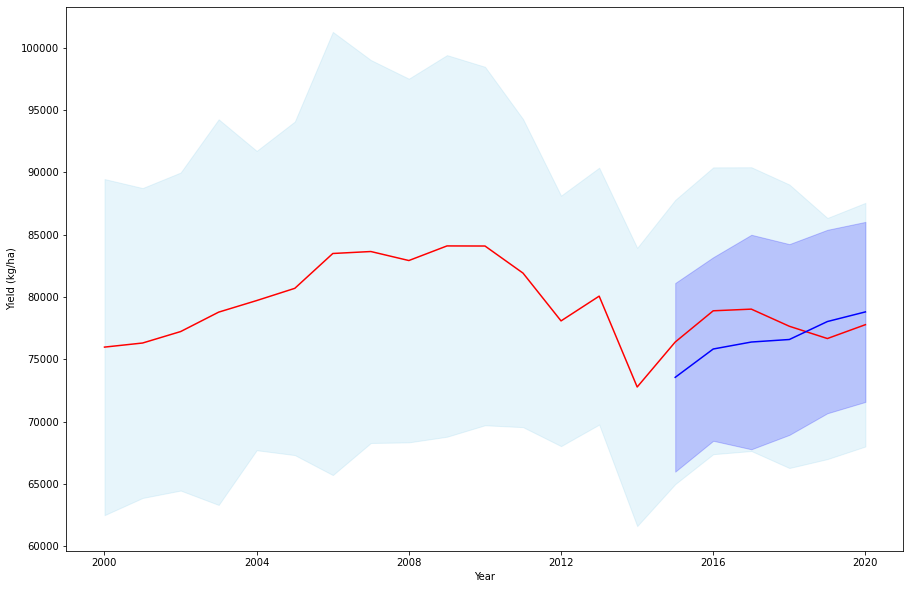

In [116]:
plt.figure(figsize = (15,10))
plt.plot(new_data_by_year['Year'], new_data_by_year['Yield'], color = 'red', label='observed')
plt.fill_between(new_data_by_year['Year'], (new_data_by_year['Yield'] + new_data_by_year['st_yield']), 
                 (new_data_by_year['Yield'] - new_data_by_year['st_yield']), alpha = 0.2, color = 'skyblue')
plt.plot(new_pred_by_year['Year'], new_pred_by_year['Predicted yield'], color = 'blue', label = 'predicted')
plt.fill_between(new_pred_by_year['Year'], (new_pred_by_year['Predicted yield'] + new_pred_by_year['st_pred_yield']), 
                (new_pred_by_year['Predicted yield'] - new_pred_by_year['st_pred_yield']), alpha = 0.2, color = 'blue')
plt.ylabel('Yield (kg/ha)')
plt.xlabel('Year')
#plt.savefig("predicted_yield_over_time.jpeg", dpi = 300)
plt.show()

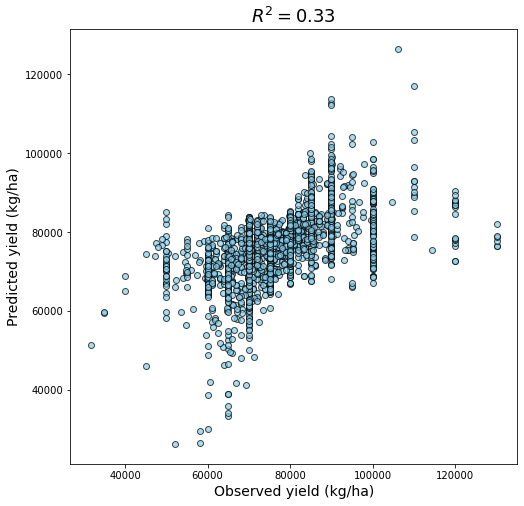

In [117]:
# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(pred_yield['Yield'], pred_yield['Predicted yield'], edgecolor='k', facecolor='skyblue', alpha=0.7)
ax.set_ylabel('Predicted yield (kg/ha)', fontsize=14)
ax.set_xlabel('Observed yield (kg/ha)', fontsize=14)
r2 = 0.33
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
#plt.savefig('predicted_vs_observed_2015-2020.jpeg', dpi = 300)
plt.show()